# Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flight_delays_test.csv')

# Display the first few rows of the dataset
print(df.head())


  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
0   c-7       c-25       c-3      615            YV    MRY  PHX       598
1   c-4       c-17       c-2      739            WN    LAS  HOU      1235
2  c-12        c-2       c-7      651            MQ    GSP  ORD       577
3   c-3       c-25       c-7     1614            WN    BWI  MHT       377
4   c-6        c-6       c-3     1505            UA    ORD  STL       258


# Check for Null Values

In [3]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Drop rows with null values (if any)
df_cleaned = df.dropna()

# Verify that there are no null values left
print("Null values after cleaning:\n", df_cleaned.isnull().sum())


Null values in each column:
 Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64
Null values after cleaning:
 Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64


# Remove Duplicate Rows

In [4]:
# Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify that there are no duplicates left
print("Number of duplicate rows after cleaning:", df_cleaned.duplicated().sum())

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_flight_delays.csv', index=False)

print("Data cleaning completed and saved to 'cleaned_flight_delays.csv'")


Number of duplicate rows: 0
Number of duplicate rows after cleaning: 0
Data cleaning completed and saved to 'cleaned_flight_delays.csv'


# Cleaning flight_delays_train.csv

In [5]:
import pandas as pd

# Load the dataset
df_train = pd.read_csv('flight_delays_train.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:\n", df_train.head())

# Check for null values
null_values = df_train.isnull().sum()
print("Null values in each column:\n", null_values)

# Drop rows with null values (if any)
df_train_cleaned = df_train.dropna()

# Verify that there are no null values left
print("Null values after cleaning:\n", df_train_cleaned.isnull().sum())

# Check for duplicate rows
duplicates = df_train_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicate rows
df_train_cleaned = df_train_cleaned.drop_duplicates()

# Verify that there are no duplicates left
print("Number of duplicate rows after cleaning:", df_train_cleaned.duplicated().sum())

# Save the cleaned dataset to a new CSV file
df_train_cleaned.to_csv('cleaned_flight_delays_train.csv', index=False)

print("Data cleaning completed and saved to 'cleaned_flight_delays_train.csv'")



First few rows of the dataset:
   Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1   c-4       c-20       c-3     1548            US    PIT  MCO       834   
2   c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3  c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4  c-10        c-7       c-6     1828            WN    MDW  OMA       423   

  dep_delayed_15min  
0                 N  
1                 N  
2                 N  
3                 N  
4                 Y  
Null values in each column:
 Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64
Null values after cleaning:
 Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
Uni

# Checking sample_submission.csv


In [6]:
# Load the sample submission dataset
df_sample_submission = pd.read_csv('sample_submission.csv')

# Display the first few rows of the sample submission dataset
print("First few rows of the sample submission dataset:\n", df_sample_submission.head())

# Verify the column names
print("Column names:", df_sample_submission.columns)

# Check the number of rows
print("Number of rows in sample submission:", len(df_sample_submission))

# Check for null values
null_values_sample = df_sample_submission.isnull().sum()
print("Null values in sample submission:\n", null_values_sample)

# Check for duplicate rows
duplicates_sample = df_sample_submission.duplicated().sum()
print("Number of duplicate rows in sample submission:", duplicates_sample)


First few rows of the sample submission dataset:
    id  dep_delayed_15min
0   0              0.081
1   1              0.387
2   2              0.069
3   3              0.177
4   4              0.732
Column names: Index(['id', 'dep_delayed_15min'], dtype='object')
Number of rows in sample submission: 100000
Null values in sample submission:
 id                   0
dep_delayed_15min    0
dtype: int64
Number of duplicate rows in sample submission: 0


# Exploratory Data Analysis (EDA)


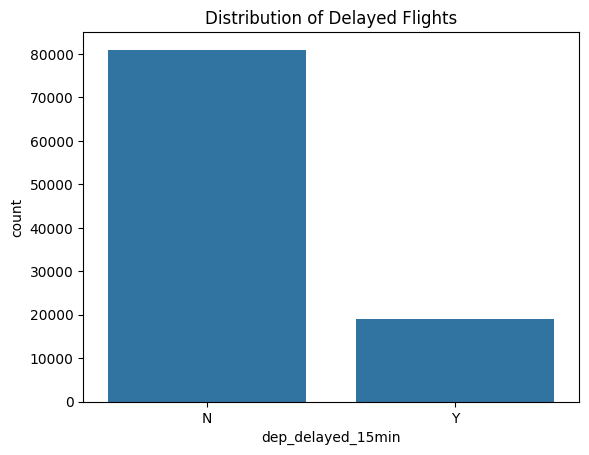

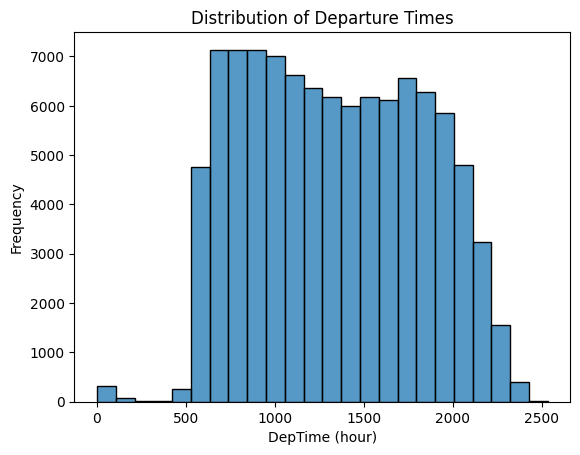

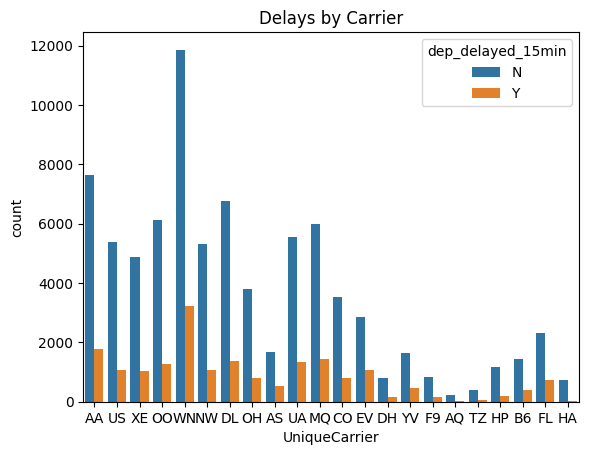

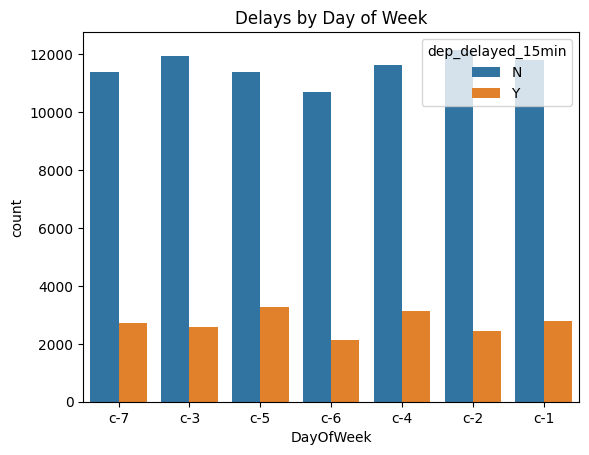

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='dep_delayed_15min', data=df_train_cleaned)
plt.title('Distribution of Delayed Flights')
plt.show()

# Distribution of departure times
sns.histplot(df_train_cleaned['DepTime'], bins=24, kde=False)
plt.title('Distribution of Departure Times')
plt.xlabel('DepTime (hour)')
plt.ylabel('Frequency')
plt.show()

# Distribution of delays by carrier
sns.countplot(x='UniqueCarrier', hue='dep_delayed_15min', data=df_train_cleaned)
plt.title('Delays by Carrier')
plt.show()

# Distribution of delays by day of week
sns.countplot(x='DayOfWeek', hue='dep_delayed_15min', data=df_train_cleaned)
plt.title('Delays by Day of Week')
plt.show()


# Feature Engineering

In [35]:
# Convert 'DepTime' to hour of the day
df_train_cleaned['DepHour'] = df_train_cleaned['DepTime'] // 100

# Convert categorical variables to dummy variables
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=['UniqueCarrier', 'Origin', 'Dest'], drop_first=True)

# Drop original 'DepTime' as it's now encoded in 'DepHour'
df_train_cleaned.drop(columns=['DepTime'], inplace=True)

# Display the first few rows of the updated dataset
print(df_train_cleaned.head())


KeyError: "None of [Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')] are in the [columns]"

# Model Building and Evaluation

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the cleaned dataset
df_train_cleaned = pd.read_csv('cleaned_flight_delays_train.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:\n", df_train_cleaned.head())

# Check data types and null values
print("Data types:\n", df_train_cleaned.dtypes)
print("Null values:\n", df_train_cleaned.isnull().sum())


First few rows of the dataset:
   Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance  \
0   c-8       c-21       c-7     1934            AA    ATL  DFW       732   
1   c-4       c-20       c-3     1548            US    PIT  MCO       834   
2   c-9        c-2       c-5     1422            XE    RDU  CLE       416   
3  c-11       c-25       c-6     1015            OO    DEN  MEM       872   
4  c-10        c-7       c-6     1828            WN    MDW  OMA       423   

  dep_delayed_15min  
0                 N  
1                 N  
2                 N  
3                 N  
4                 Y  
Data types:
 Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object
Null values:
 Month                0
DayofMonth           0
DayOfWeek            0
DepTime    

In [42]:
# Convert categorical features to dummy variables
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=['UniqueCarrier', 'Origin', 'Dest'], drop_first=True)

# Convert target variable to binary
df_train_cleaned['dep_delayed_15min'] = df_train_cleaned['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)

# Display the first few rows of the updated dataset
print("First few rows of the updated dataset:\n", df_train_cleaned.head())


First few rows of the updated dataset:
   Month DayofMonth DayOfWeek  DepTime  Distance  dep_delayed_15min  \
0   c-8       c-21       c-7     1934       732                  0   
1   c-4       c-20       c-3     1548       834                  0   
2   c-9        c-2       c-5     1422       416                  0   
3  c-11       c-25       c-6     1015       872                  0   
4  c-10        c-7       c-6     1828       423                  1   

   UniqueCarrier_AQ  UniqueCarrier_AS  UniqueCarrier_B6  UniqueCarrier_CO  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   ...  Dest_TYS  Dest_VCT  Dest_VIS  Dest_VLD  Dest_VPS  Dest_WRG  Dest_WYS

In [45]:
# Check data types
print("Data types:\n", df_train_cleaned.dtypes)

# Check for non-numeric values in features
non_numeric_cols = df_train_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)

# Display unique values in non-numeric columns to check for unexpected values
for col in non_numeric_cols:
    print(f"Unique values in column {col}:\n", df_train_cleaned[col].unique())


Data types:
 Month         object
DayofMonth    object
DayOfWeek     object
DepTime        int64
Distance       int64
               ...  
Dest_WRG        bool
Dest_WYS        bool
Dest_XNA        bool
Dest_YAK        bool
Dest_YUM        bool
Length: 603, dtype: object
Non-numeric columns:
 Index(['Month', 'DayofMonth', 'DayOfWeek'], dtype='object')
Unique values in column Month:
 ['c-8' 'c-4' 'c-9' 'c-11' 'c-10' 'c-1' 'c-7' 'c-6' 'c-5' 'c-3' 'c-12'
 'c-2']
Unique values in column DayofMonth:
 ['c-21' 'c-20' 'c-2' 'c-25' 'c-7' 'c-3' 'c-27' 'c-29' 'c-28' 'c-5' 'c-6'
 'c-10' 'c-19' 'c-26' 'c-14' 'c-22' 'c-9' 'c-31' 'c-4' 'c-16' 'c-18'
 'c-30' 'c-1' 'c-24' 'c-15' 'c-17' 'c-8' 'c-12' 'c-13' 'c-11' 'c-23']
Unique values in column DayOfWeek:
 ['c-7' 'c-3' 'c-5' 'c-6' 'c-4' 'c-2' 'c-1']


In [46]:
# Check data types
print("Data types:\n", df_train_cleaned.dtypes)

# Check for non-numeric values in features
non_numeric_cols = df_train_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)

# Display unique values in non-numeric columns to check for unexpected values
for col in non_numeric_cols:
    print(f"Unique values in column {col}:\n", df_train_cleaned[col].unique())


Data types:
 Month         object
DayofMonth    object
DayOfWeek     object
DepTime        int64
Distance       int64
               ...  
Dest_WRG        bool
Dest_WYS        bool
Dest_XNA        bool
Dest_YAK        bool
Dest_YUM        bool
Length: 603, dtype: object
Non-numeric columns:
 Index(['Month', 'DayofMonth', 'DayOfWeek'], dtype='object')
Unique values in column Month:
 ['c-8' 'c-4' 'c-9' 'c-11' 'c-10' 'c-1' 'c-7' 'c-6' 'c-5' 'c-3' 'c-12'
 'c-2']
Unique values in column DayofMonth:
 ['c-21' 'c-20' 'c-2' 'c-25' 'c-7' 'c-3' 'c-27' 'c-29' 'c-28' 'c-5' 'c-6'
 'c-10' 'c-19' 'c-26' 'c-14' 'c-22' 'c-9' 'c-31' 'c-4' 'c-16' 'c-18'
 'c-30' 'c-1' 'c-24' 'c-15' 'c-17' 'c-8' 'c-12' 'c-13' 'c-11' 'c-23']
Unique values in column DayOfWeek:
 ['c-7' 'c-3' 'c-5' 'c-6' 'c-4' 'c-2' 'c-1']


In [47]:
# Print the columns of the DataFrame to check which ones are available
print("Available columns in df_train_cleaned:\n", df_train_cleaned.columns)



Available columns in df_train_cleaned:
 Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance',
       'dep_delayed_15min', 'UniqueCarrier_AQ', 'UniqueCarrier_AS',
       'UniqueCarrier_B6', 'UniqueCarrier_CO',
       ...
       'Dest_TYS', 'Dest_VCT', 'Dest_VIS', 'Dest_VLD', 'Dest_VPS', 'Dest_WRG',
       'Dest_WYS', 'Dest_XNA', 'Dest_YAK', 'Dest_YUM'],
      dtype='object', length=603)


In [21]:
# Check for any leading or trailing spaces in column names
df_train_cleaned.columns = df_train_cleaned.columns.str.strip()
print("Cleaned column names:\n", df_train_cleaned.columns)


Cleaned column names:
 Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance',
       'dep_delayed_15min', 'UniqueCarrier_AQ', 'UniqueCarrier_AS',
       'UniqueCarrier_B6', 'UniqueCarrier_CO',
       ...
       'Dest_TYS', 'Dest_VCT', 'Dest_VIS', 'Dest_VLD', 'Dest_VPS', 'Dest_WRG',
       'Dest_WYS', 'Dest_XNA', 'Dest_YAK', 'Dest_YUM'],
      dtype='object', length=603)


In [48]:
# List columns expected for one-hot encoding
expected_columns = ['UniqueCarrier', 'Origin', 'Dest']
print("Expected columns for encoding:\n", expected_columns)

# Verify if these columns exist in the DataFrame
missing_columns = [col for col in expected_columns if col not in df_train_cleaned.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")


Expected columns for encoding:
 ['UniqueCarrier', 'Origin', 'Dest']
Missing columns: ['UniqueCarrier', 'Origin', 'Dest']


In [49]:
# Assuming 'Month', 'DayofMonth', and 'DayOfWeek' are the only features, proceed with those
df_train_cleaned = pd.get_dummies(df_train_cleaned, drop_first=True)

# Display the first few rows after transformation
print("First few rows after dummy encoding:\n", df_train_cleaned.head())


First few rows after dummy encoding:
    DepTime  Distance  dep_delayed_15min  UniqueCarrier_AQ  UniqueCarrier_AS  \
0     1934       732                  0             False             False   
1     1548       834                  0             False             False   
2     1422       416                  0             False             False   
3     1015       872                  0             False             False   
4     1828       423                  1             False             False   

   UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DH  UniqueCarrier_DL  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   UniqueCarrier_EV  ...

In [52]:
# Define features and target variable
X = df_train_cleaned.drop(columns=['dep_delayed_15min'])
y = df_train_cleaned['dep_delayed_15min']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba))


Prediction and Submission

IndexError: list index out of range

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print(f"Best ROC AUC Score: {grid_search.best_score_}")

# Update model with the best parameters
best_model = grid_search.best_estimator_


KeyboardInterrupt: 